# lmplot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Функция `sns.lmplot()` (linear model plot) в библиотеке *seaborn* предназначена для построения линейных моделей (линейных регрессий) и их визуализации. Она сочетает в себе функциональность регрессионного анализа и возможности по созданию различных подграфиков.

Основные параметры:
- `data`: DataFrame, массив;
- `x, y, hue`: переменные для построения графика. X и Y задают координаты, а hue позволяет добавлять цветовое различие для дополнительной переменной;
- `col`: название переменной для создания столбцов подграфиков.;
- `row`: название переменной для создания рядов подграфиков;
- `col_wrap`: определяет максимальное количество столбцов в одном ряду;
- `hue_order`: порядок отображения категорий по параметру hue;
- `col_order`: определяет порядок категорий для столбцов многопанельного графика;
- `row_order`: определяет порядок категорий для рядов многопанельного графика;
- `height`: высота каждого подграфика в дюймах (по умолчанию height=5);
- `aspect`: соотношение сторон каждого подграфика (по умолчанию aspect=1);
- `markers`: маркеры для различных значений переменной hue;
- `x_estimator`: позволяет задать функцию для оценки центрального значения в каждой группе значений по оси X;
- `x_bins`: разбивает ось X на равные интервалы (бины) и отображает средние значения для каждого из этих интервалов;
- `x_ci`: задаёт доверительный интервал для центрального значения по оси X  (по умолчанию x_ci='ci');
- `scatter`: определяет рисовать ли диаграмму рассеяния (по умолчанию scatter=True);
- `fit_reg`: если True (по умолчанию), на графике отображается регрессионная линия;
- `ci`: доверительный интервал для линии регрессии (по умолчанию ci=95). Если None, доверительный интервал не строится.
- `n_boot`: количество выборок для вычисления доверительного интервала (по умолчанию n_boot=1000);
- `seed`: задает начальное значение для генератора случайных чисел, что обеспечивает повторяемость результатов при многократном запуске кода;
- `logistic`: если True, то рисуется линия логистической регрессии вместо линейной (по умолчанию logistic=False);
- `lowess`: если True, то рисуется линия lowess регрессии (локально взвешенная регрессия) вместо линейной (по умолчанию lowess=False);
- `robust`: если True, то рисуется линия robust регрессии (устойчивая регрессия) вместо линейной (по умолчанию robust=False);
- `truncate`: если True (по умолчанию), регрессионная линия обрезается до границ данных по оси X;
- `x_jitter`: величина, на которую будут случайно смещены значения по оси X для визуализации распределения точек с одинаковыми X-значениями;
- `y_jitter`: величина, на которую будут случайно смещены значения по оси Y для визуализации распределения точек с одинаковыми Y-значениями.

Разбирать примеры работы функции `sns.lmplot()` будем на данных из датасета о параметрах трёх видах пингвинов. Загрузим этот датасет:

In [3]:
penguins = sns.load_dataset('penguins').dropna()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Датасет `penguins` содержит следующие столбцы:
- `'species'` - вид пингвина (Adelie, Chinstrap, Gentoo);
- `'island'` - остров, где были собраны данные (Biscoe, Dream, Torgersen);
- `'bill_length_mm'` - длина клюва в миллиметрах;
- `'bill_depth_mm'` - глубина клюва в миллиметрах;
- `'flipper_length_mm'` - длина ласт в миллиметрах;
- `'body_mass_g'` - масса тела в граммах;
- `'sex'` - пол пингвина (Male, Female).

Для начала построим график зависимости длины клюва от его глубины с параметрами по умолчанию:

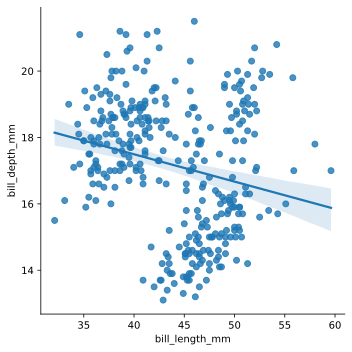

In [5]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')
plt.show()

По сути, построилась диаграмма рассеяния с наложением на неё линии линейной регрессии с доверительным интервалом.

Доверительный интервал можно и не показывать на графике, для этого параметру `ci` следует присвоить значение `None`:

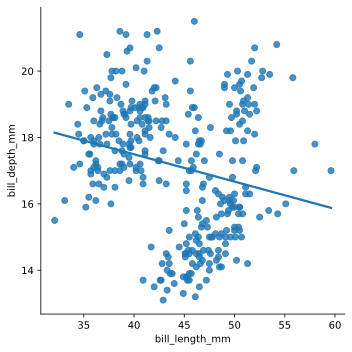

In [6]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           ci=None)
plt.show()

Далее посмотрим, как функция `sns.lmplot()` работает с параметром `hue`. Для этого построим диаграмму с разбивкой по видам пингвинов.

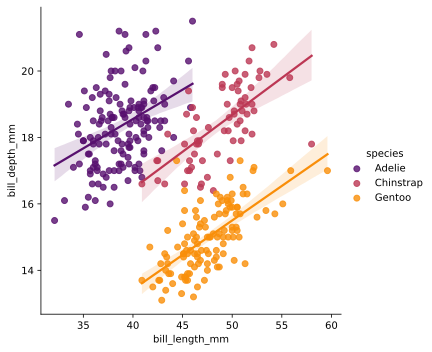

In [7]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species')
plt.show()

Каждая линия регрессия по умолчанию строится в пределах диапазона значений каждой категории по оси `X`. Для того, чтобы линии регрессии отобразились на всю ширину диаграммы, нужно параметру `truncate` передать значение `False`:

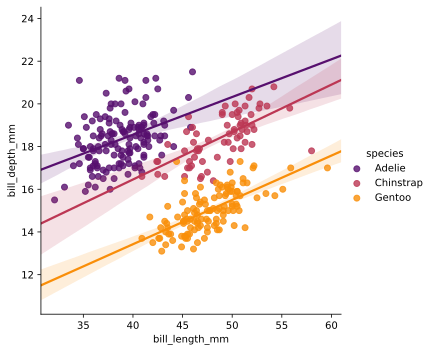

In [8]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           truncate=False)
plt.show()

Параметр `markers` позволяет менять варианты отображения точек на графике в зависимости от категории. В нашем случае мы имеем три категории, значит и передать параметру `markers` нужно три варианта отображения точек:

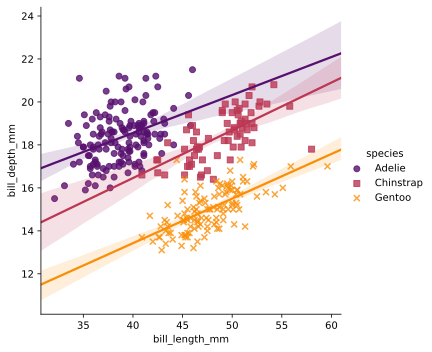

In [9]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           truncate=False,
           markers=['o', 's', 'x'])
plt.show()

Функция `sns.lmplot()` в своём арсенале имеет параметры `col` и `row`, позволяющие разбивать данные на отдельные подгруппы и отображать их на подграфиках в виде сетки. Например, нарисуем зависимости длины и глубины клюва для каждого вида пингвинов на отдельных подграфиках:

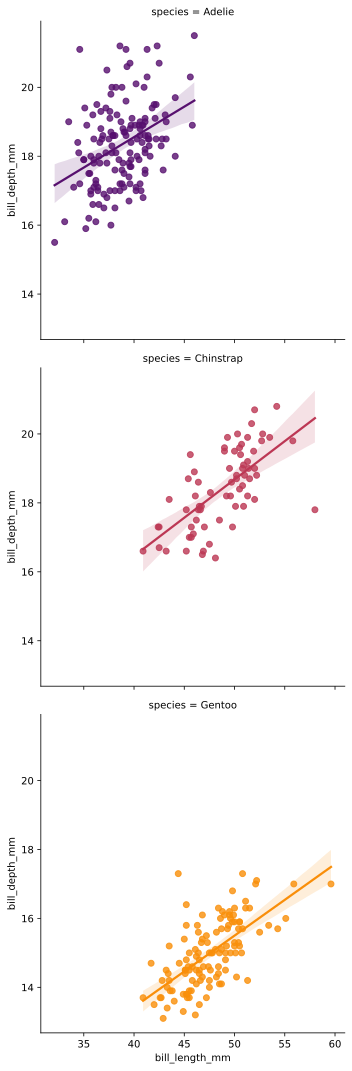

In [10]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           row='species')
plt.show()

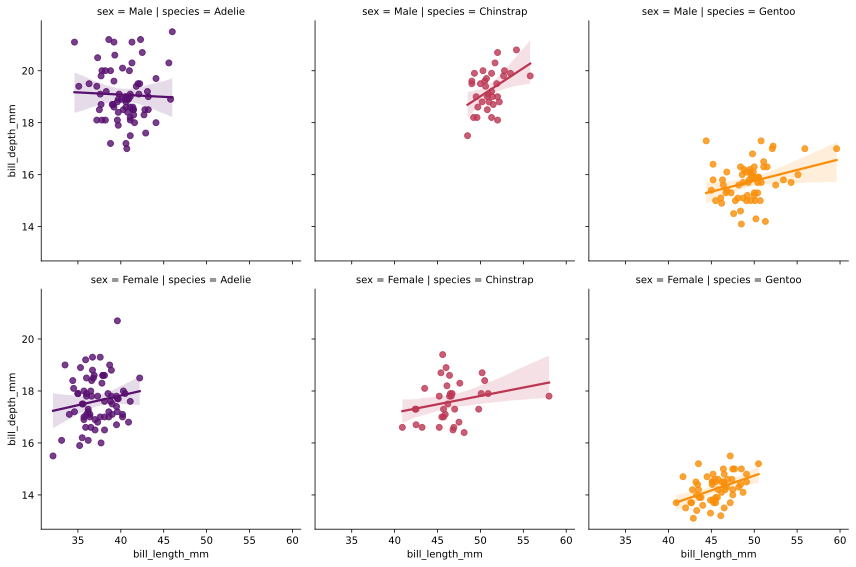

In [11]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           col='species',
           row='sex',
           height=4)
plt.show()

**Параметры x_bins, x_estimator, x_ci**

Параметр `x_bins` разбивает ось X на равные интервалы (бины) и отображает средние значения (или другие статистики) для каждого из этих интервалов. Например, разобьём значения на пять интервалов и посмотрим, как распределены средние значения:

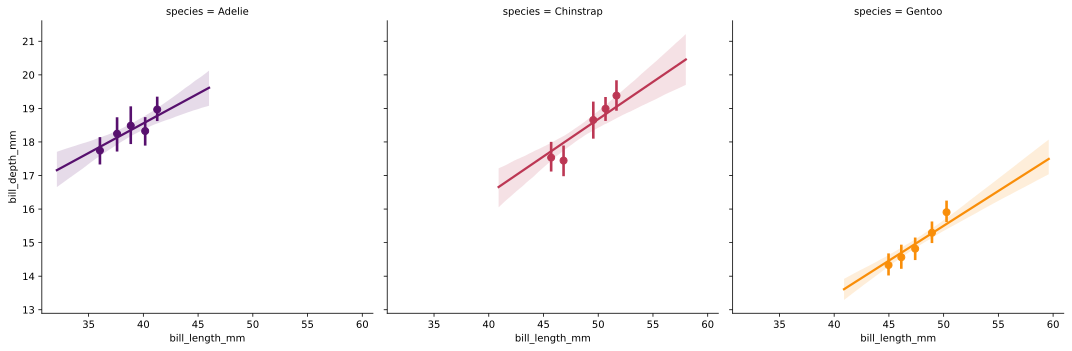

In [12]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           col='species',
           x_bins=5)
plt.show()

Использование этого параметра может быть полезно в случаях, когда у вас большой объем данных, и вы хотите упростить график.

По умолчанию, на предыдущей диаграмме отобразились средние значения. Но возможно использовать и другие статистики, за что отвечает параметр `x_estimator`. Для примера посмотрим на медианные значения:

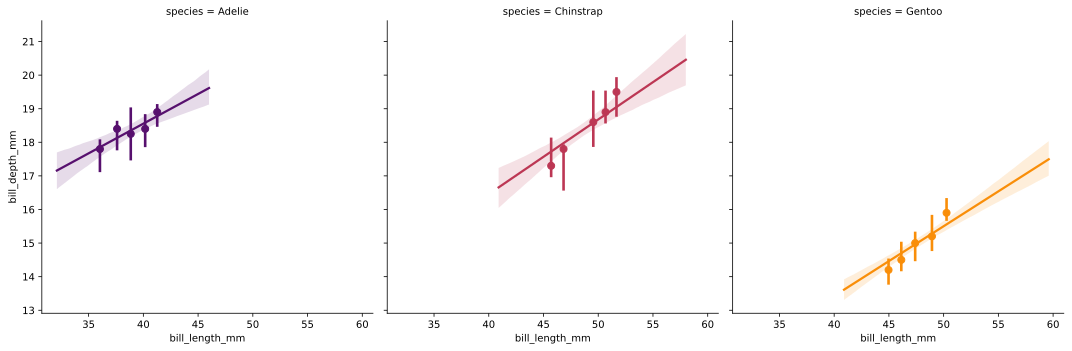

In [13]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           col='species',
           x_bins=5,
           x_estimator=np.median)
plt.show()

Как видим, значения на графиках немного отличаются от предыдущего варианта.

Следующий параметр - это параметр `x_ci`. Он задаёт доверительный интервал для центрального значения по оси X. Доверительный интервал показывает диапазон, в котором находится истинное среднее значение (или другая статистика) с определённой вероятностью.

По умолчанию `x_ci='ci'`, а также может принимать целочисленные значения от 0 до 100, 'sd' и None.

`x_ci=99`:

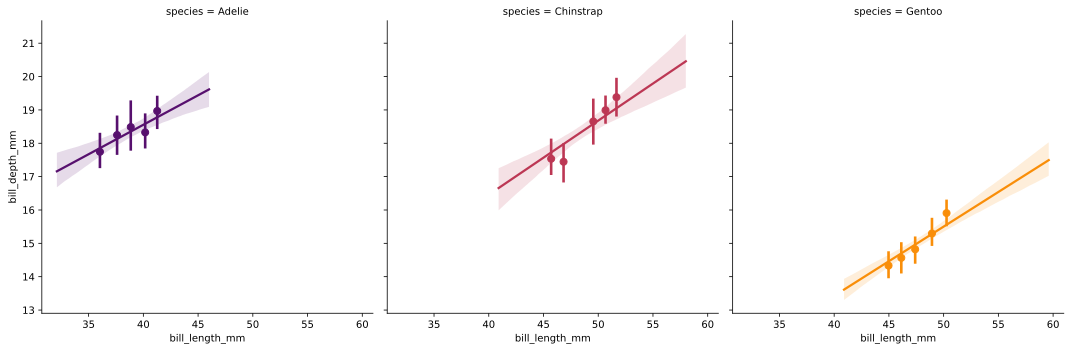

In [14]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           col='species',
           x_bins=5,
           x_ci=99)
plt.show()

`x_ci='sd'` (стандартное отклонение):

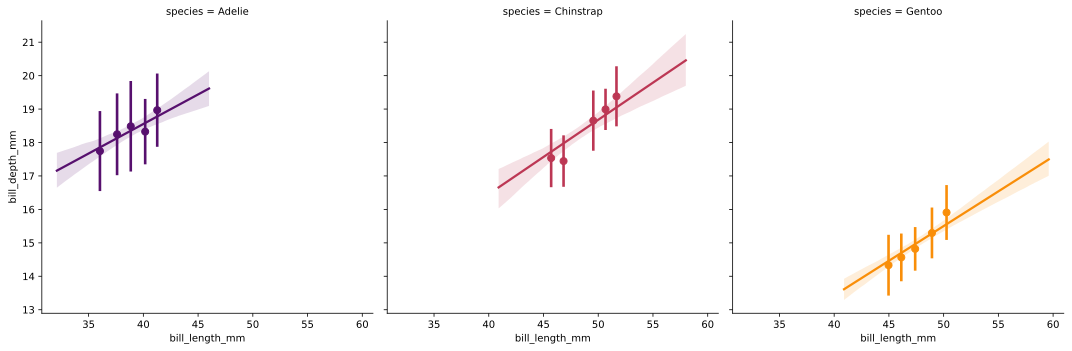

In [15]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           col='species',
           x_bins=5,
           x_ci='sd')
plt.show()

`x_ci=None`:

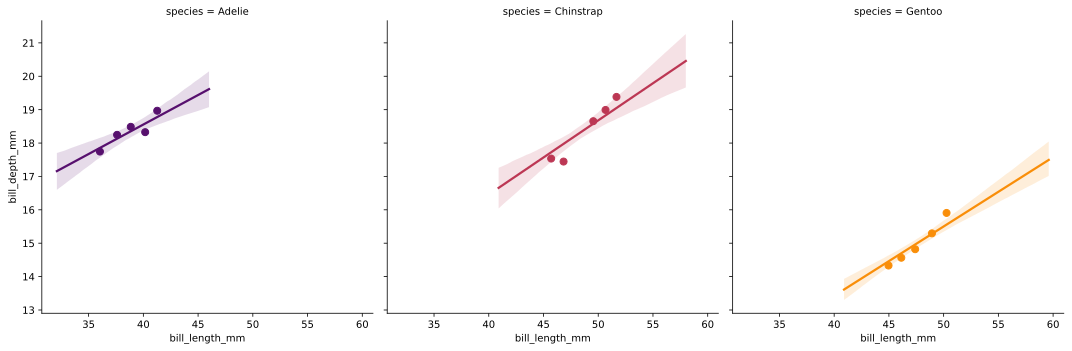

In [16]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           col='species',
           x_bins=5,
           x_ci=None)
plt.show()

**Параметр scatter_kws**

Параметр `scatter_kws` в функции `sns.lmplot()` используется для настройки отображения точек на графике. Этот параметр принимает словарь, содержащий различные параметры.

Возможные значения для `scatter_kws`:
- `color`: цвет точек;
- `s`: размер точек;
- `alpha`: прозрачность точек;
- `edgecolor`: цвет границы точек;
- `linewidth`: толщина границы точек.

Изменение цвета точек:

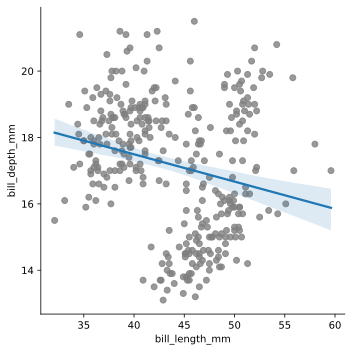

In [17]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           scatter_kws={'color': 'gray'})
plt.show()

Увеличение размера точек и изменение цвета их границ:

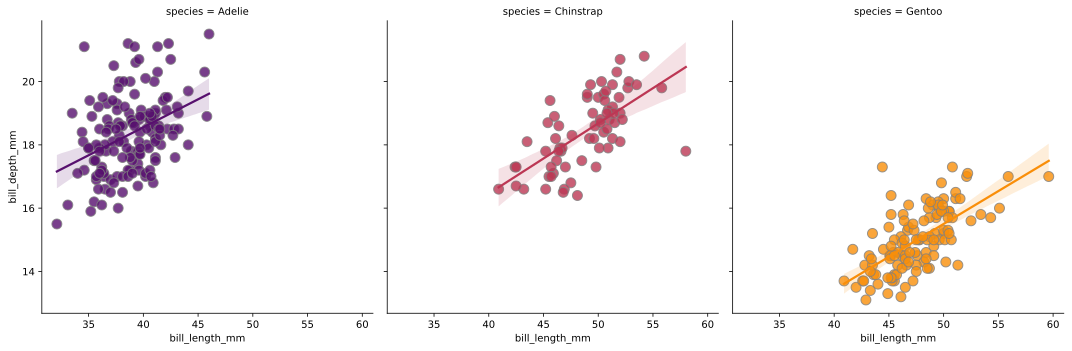

In [18]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           col='species',
           scatter_kws={'s': 100, 'edgecolor': 'grey'})
plt.show()

Сделаем точки полупрозрачными:

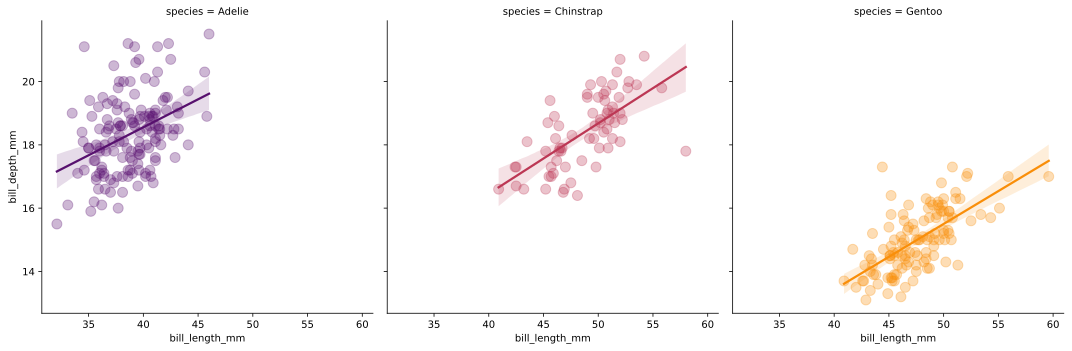

In [19]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           col='species',
           scatter_kws={'s': 100, 'alpha': 0.3})
plt.show();

**Параметр line_kws**

Параметр `line_kws` принимает словарь, содержащий различные настройки для отображения линии регрессии.

Для примера изменим ширину, цвет и стиль линии регрессии:

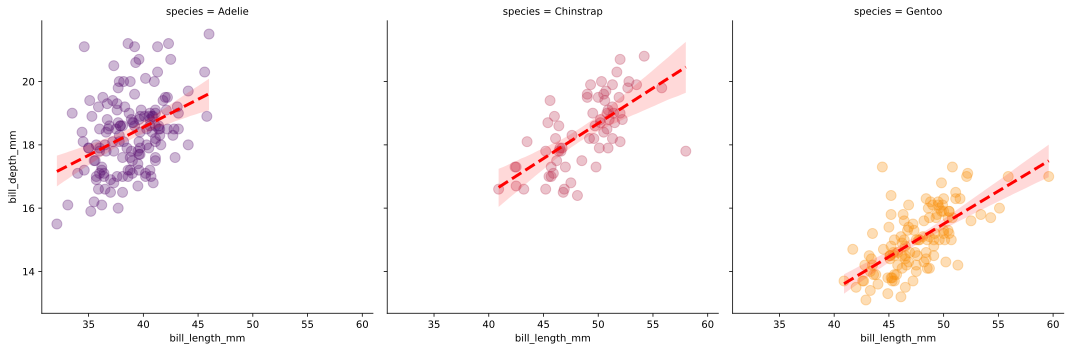

In [20]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           col='species',
           scatter_kws={'s': 100, 'alpha': 0.3},
           line_kws={'linewidth': 3, 'linestyle': '--', 'color': 'red'})
plt.show()

**Параметр facet_kws**

Параметр `facet_kws` в функции `sns.lmplot()` используется для передачи дополнительных аргументов в объект **FacetGrid**, который создаёт сетку графиков. **FacetGrid** отвечает за разбиение данных на отдельные подгруппы и отображение их в виде многострочных и многостолбцовых графиков. Параметр `facet_kws` принимает словарь, содержащий различные настройки для **FacetGrid**.

Функция `sns.lmplot()` не содержит таких параметров, как `sharex` и `sharey`, используемых для настройки координатных осей. Но зато их можно передать словарю `facet_kws`, который отмасштабирует координатные оси подграфиков. Например:

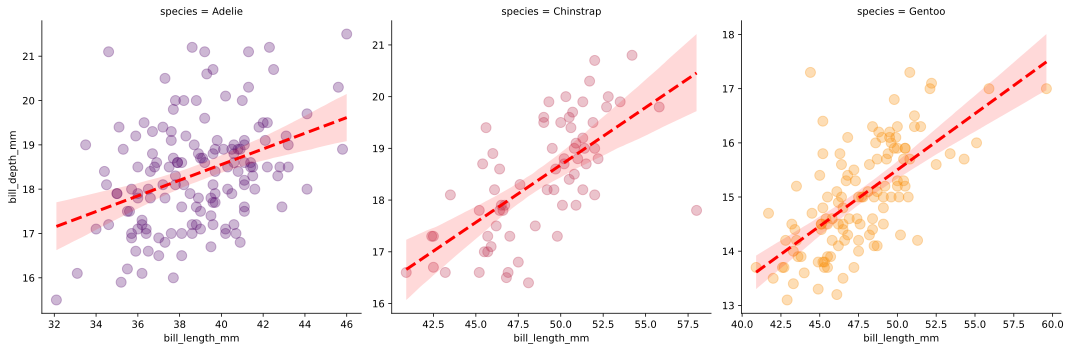

In [21]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           col='species',
           scatter_kws={'s': 100, 'alpha': 0.3},
           line_kws={'linewidth': 3, 'linestyle': '--', 'color': 'red'},
           facet_kws=dict(sharex=False, sharey=False))
plt.show()

Также передадим словарю `facet_kws` параметр `despine=False` для прорисовки верхней и правой границы каждого подграфика:

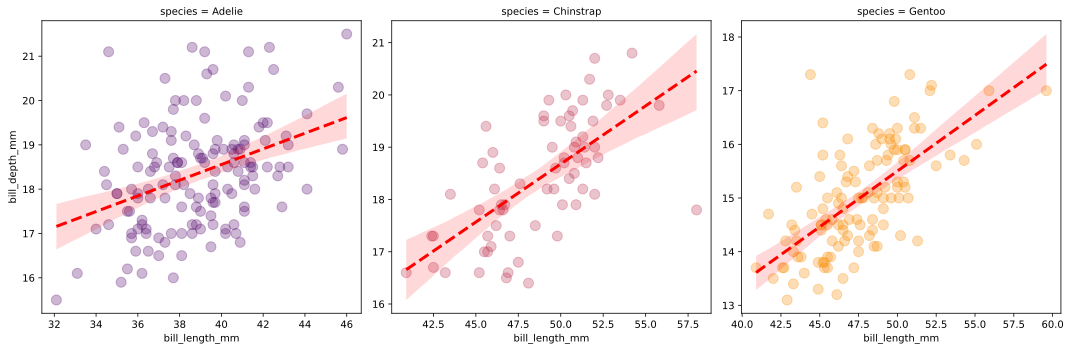

In [22]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           col='species',
           scatter_kws={'s': 100, 'alpha': 0.3},
           line_kws={'linewidth': 3, 'linestyle': '--', 'color': 'red'},
           facet_kws=dict(sharex=False, sharey=False, despine=False))
plt.show()

**Параметр robust**

Параметр `robust` позволяет строить линию robust-регрессии вместо линейной. Робастная (устойчивая) регрессия использует веса с целью снижения влияния выбросов в данных.

Применим этот параметр для построения графика:

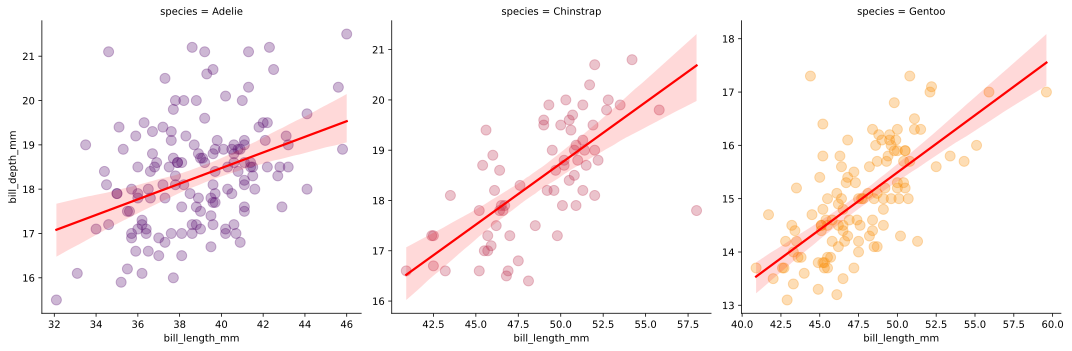

In [23]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           col='species',
           scatter_kws={'s': 100, 'alpha': 0.3},
           line_kws={'color': 'red'},
           facet_kws=dict(sharex=False, sharey=False),
           robust=True)
plt.show()

Структура данных такова, что графики не сильно различаются, но еле уловимая разница всё-таки есть.

**Параметр lowess**

Параметр `lowess`  используется для построения линии lowess-регрессии (локально взвешенная регрессия). Это способ построить сглаженную кривую, которая показывает тенденцию в данных, особенно если данные разбросаны и трудно понять общий тренд. Вместо того чтобы пытаться подогнать одну прямую линию ко всем данным, `lowess` подходит к вопросу хитрее. Например, представьте диаграмму расеяния с можеством точек. `Lowess` берёт небольшие "окошки" из этих точек, строит маленькие линии тренда в каждом окне и потом соединяет эти линии. Получается сглаженная линия, которая более точно отображает тренд данных.

Пример построения графика с отображением локально взвешенной линии регрессии:

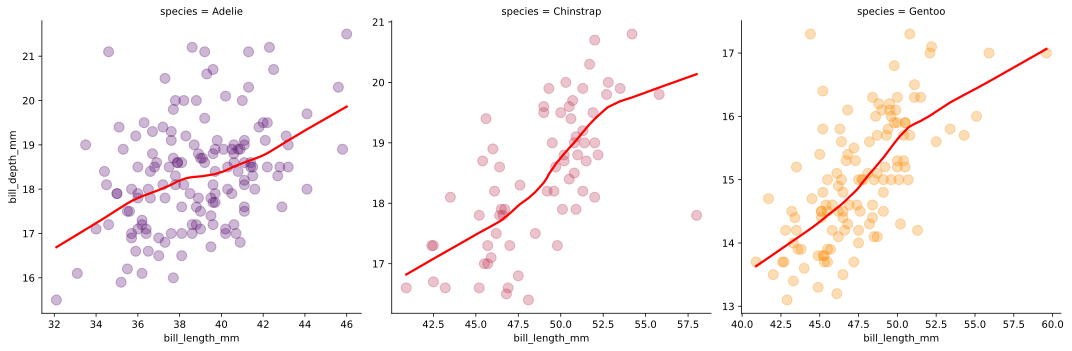

In [24]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='inferno',
           hue='species',
           col='species',
           scatter_kws={'s': 100, 'alpha': 0.3},
           line_kws={'color': 'red'},
           facet_kws=dict(sharex=False, sharey=False),
           lowess=True)
plt.show()

**Параметр logistic**

Вместо линейной регрессии, функция `sns.lmplot()` позволяет построить логистическую регрессию, с применением параметра `logistic=True`. Логистическая регрессия применяется, когда зависимая переменная является бинарной, то есть принимает только два значения, например, 0 и 1  или False и True.

Вместо предсказания непрерывного значения, логистическая регрессия предсказывает вероятность того, что наблюдение принадлежит к определенной категории. Она использует логистическую (сигмоидальную) функцию для преобразования выходного значения линейной комбинации входных переменных в вероятность, которая находится в диапазоне от 0 до 1. В итоге на графике отображается S-образная кривая, которая лучше всего отделяет две категории данных.

В нашем наборе данных имеется одна бинарная переменная - это пол пингвина. Создадим дополнительный столбец `'sex_new'`, в котором будут единицы, если пингвин самец и нули, если - самка:

In [25]:
penguins['sex_new'] = [int(x=='Male') for x in penguins['sex']]

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_new
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1


Теперь построим график с отображением линии логистической регрессии:

C:\Users\ardat\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


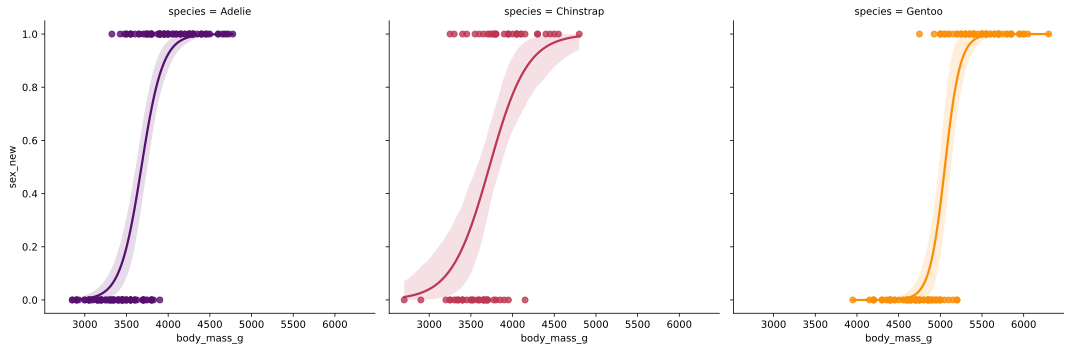

In [26]:
sns.lmplot(data=penguins, x='body_mass_g', y='sex_new',
           palette='inferno',            
           hue='species',
           col='species',
           logistic=True)
plt.show()

По оси ординат отложилась шкала вероятности от 0 до 1.